In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set up
data = pd.read_csv("music2.csv")
age_data = data['age']
genre_data = data['genre']
gender_data = data['gender']

In [19]:
# Part 1
max = np.max(age_data)
min = np.min(age_data)
mean = np.mean(age_data)
median = np.median(age_data)
variance = np.var(age_data)
std = np.std(age_data)

print (max, min, mean, median, variance, std)

69 18 43.5518 44.0 226.1892767599957 15.039590312239083


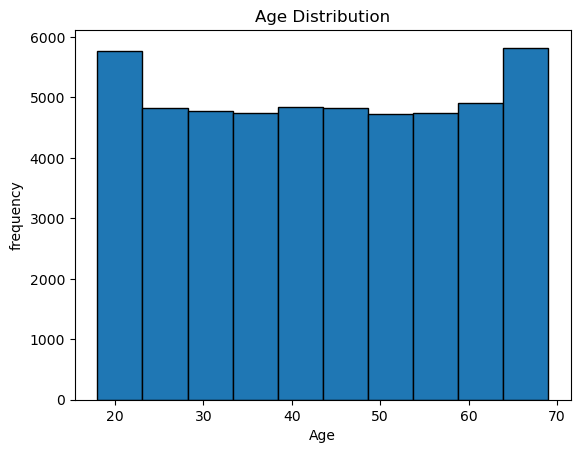

<BarContainer object of 10 artists>

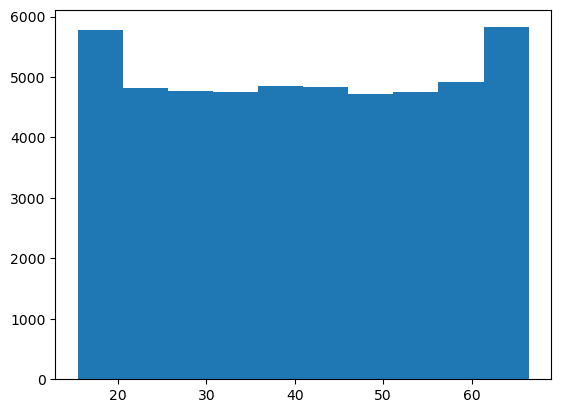

In [20]:
# Part 2.1
plt.figure()

# As shown by Dr. Torre
plt.hist(age_data, bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

# As shown in the book
hist = np.histogram(age_data)
plt.bar(edges1[:-1], hist1, width = edges1[1:]-edges1[:-1])

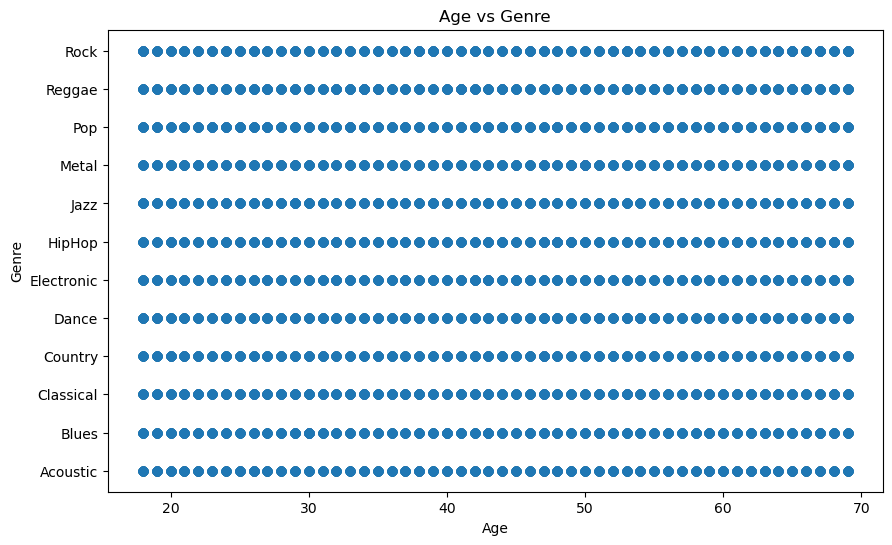

In [29]:
# Part 2.2

# Convert genre_data to numerical data
genre_data = genre_data.astype('category')
data['genre_code'] = genre_data.cat.codes
genre_code_data = data['genre_code']

plt.figure(figsize=(10,6))
plt.scatter(age_data, genre_code_data)
plt.title('Age vs Genre')
plt.xlabel('Age')
plt.ylabel('Genre')
plt.yticks(range(len(genre_data.cat.categories)), genre_data.cat.categories)
plt.show()

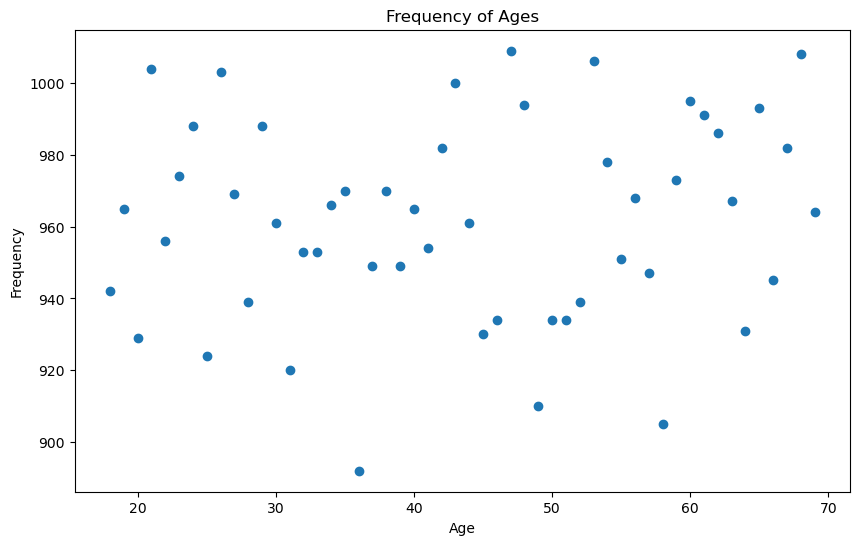

In [25]:
# Part 2.4a
age_frequency = age_data.value_counts()
plt.figure(figsize=(10,6))
plt.scatter(age_frequency.index, age_frequency.values)
plt.title('Frequency of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

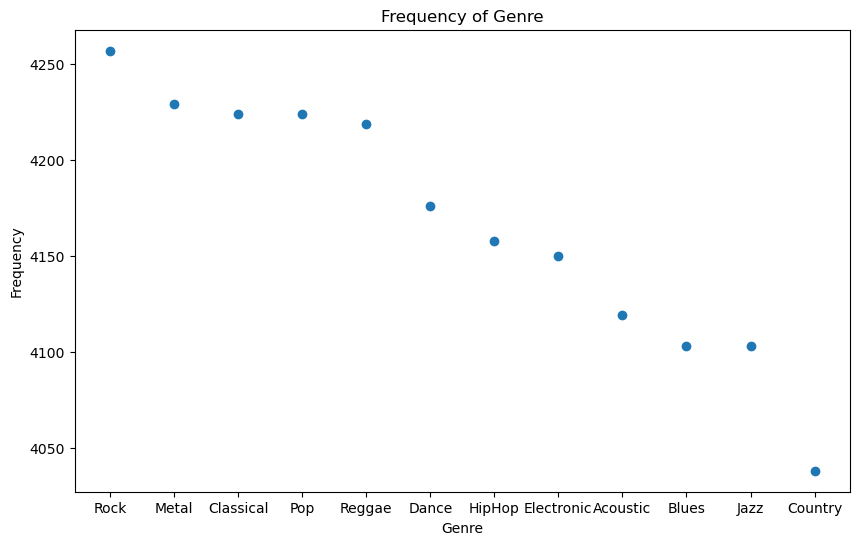

In [26]:
# Part 2.4b
genre_frequency = genre_data.value_counts()
plt.figure(figsize=(10,6))
plt.scatter(genre_frequency.index, genre_frequency.values)
plt.title('Frequency of Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Part 3
np.corrcoef(age_data, genre_code_data)[0,1]

-.00008

# Very close to 0, indicating a weak relationship. Negative correlation, meaning when one inverse relationship.

-8.466560790335843e-05

In [48]:
# Part 4

# split data into training and verification sets
X = data.drop(columns=['genre'])
y = data['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model
model = DecisionTreeClassifier()

# train model
model.fit(X_train, y_train)

# make prediction
predictions = model.predict(X_test)

# evaluate and improve
score = accuracy_score(y_test, predictions)
print(score)

0.0877
